# Assignment 2 
Group 69   
Albin Landgren (8 hours spent), Alexander Jyborn (8 hours spent)
## 1a.

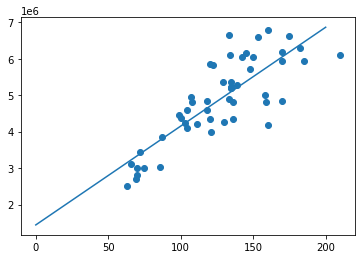

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from scipy import stats


#Load the datasets into pandas DataFrames
data = pd.read_csv('data_assignment2.csv')
data['price_sqm'] = data['Selling_price'] / data['Living_area']

data = data[(np.abs(stats.zscore(data['price_sqm'])) < 1.5)]


x = np.array(data['Living_area'])
X = x[:, np.newaxis]
y = np.array(data['Selling_price'])

model = LinearRegression().fit(X, y)
plt.scatter(x, y)
xfit = np.linspace(0, 200, 1000)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.plot(xfit, yfit)

plt.show()

**Data cleaning & reasoning**  
We decided to remove a few extreme outliers (> 1.5 std deviations) as these impact the regression line heavily. 
The outliers would skew the predictions as the probability of future values differing this much from the mean is
very low.

## 1b.
**Slope value & intercept**

In [ ]:
print(f'Slope: {round(model.coef_[0])}, Intercept: {round(model.intercept_)}')

Slope: 27114, Intercept: 1440596


## 1c.
**Model prediction selling prices**

In [ ]:
pred_100 = round(model.predict([[100]])[0])
print(f'Prediction for 100: {pred_100}')

Prediction for 100: 4151968


In [ ]:
pred_150 = round(model.predict([[150]])[0])
print(f'Prediction for 150: {pred_150}')

Prediction for 150: 5507653


In [ ]:
pred_200 = round(model.predict([[200]])[0])
print(f'Prediction for 200: {pred_200}')

Prediction for 200: 6863339


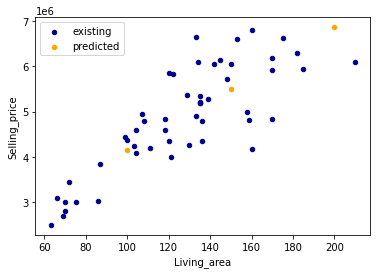

In [ ]:
predicted = pd.DataFrame(list(zip([100, 150, 200], [pred_100, pred_150, pred_200])), columns=['Living_area', 'Selling_price'])
predicted['Predicted'] = 1
data['Predicted'] = 0
combined = data.append(predicted)
grouped = combined.groupby('Predicted')

colors = {0: 'darkblue', 1: 'orange'}
labels = {0: 'existing', 1: 'predicted'}

fig, ax = plt.subplots()

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Living_area', y='Selling_price', label=labels[key], color=colors[key])


plt.show()

## 1d.

<AxesSubplot:>

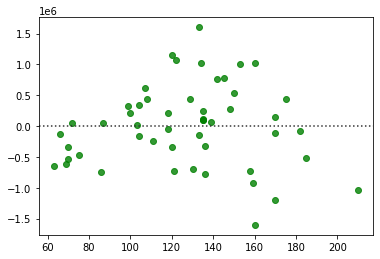

In [ ]:
sns.residplot(x=X, y=y, color="g")

## 1e.
The residual plot above tells us that the linear regression model seems to be balanced and no major outliers exist in the data plotted. The predicted values of 100,150,200sqm 
seem to be getting reasonable prices compared to the the others. Can be seen in the plot under 1c where predicted values are represented as yellow dots.  
If there were more data points in the set the model would most likely have an improved performance as more data can give us an even more accurate regression line.


## 2a.

0.9210526315789473


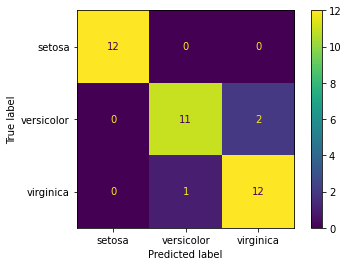

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

#Import and split dataset
data=load_iris()
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# Train the model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=data.target_names)

We trained the model with a decision tree classifier and a training set, and then used the confusion matrix to visualize the performance. Most of the predictions were
correct = our predicted value was the same as the value from the test set.
The use of a train/test set should be used because it gave us a high prediction accuracy, about atleast 90%. This should also work for even larger datasets.

## 2b.
**Uniform weights**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_test(n_neighbors, weights='uniform', print_weights=False):
    #Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean', weights=weights)
    knn.fit(X_train, y_train)
    #Predict values
    y_pred = knn.predict(X_test)
    if print_weights:
        print("weights:", weights, "k =",n_neighbors,"Accuracy:",accuracy_score(y_test, y_pred))
    else:
        print("k =",n_neighbors,"Accuracy:",accuracy_score(y_test, y_pred))

knn_test(n_neighbors=1)
knn_test(n_neighbors=3)
knn_test(n_neighbors=7)
knn_test(n_neighbors=13)
knn_test(n_neighbors=21)
knn_test(n_neighbors=31)
knn_test(n_neighbors=43)
knn_test(n_neighbors=97)
knn_test(n_neighbors=111)


k = 1 Accuracy: 0.9473684210526315
k = 3 Accuracy: 0.9473684210526315
k = 7 Accuracy: 0.9736842105263158
k = 13 Accuracy: 0.9473684210526315
k = 21 Accuracy: 0.9736842105263158
k = 31 Accuracy: 0.9736842105263158
k = 43 Accuracy: 0.9473684210526315
k = 97 Accuracy: 0.631578947368421
k = 111 Accuracy: 0.3157894736842105


**Distance weights**

In [ ]:
knn_test(n_neighbors=1,  weights='distance')
knn_test(n_neighbors=3,  weights='distance')
knn_test(n_neighbors=3,  weights='distance')
knn_test(n_neighbors=13, weights='distance')
knn_test(n_neighbors=21, weights='distance')
knn_test(n_neighbors=31, weights='distance')
knn_test(n_neighbors=43, weights='distance')
knn_test(n_neighbors=97, weights='distance')
knn_test(n_neighbors=111, weights='distance')

k = 1 Accuracy: 0.9473684210526315
k = 3 Accuracy: 0.9473684210526315
k = 3 Accuracy: 0.9473684210526315
k = 13 Accuracy: 0.9473684210526315
k = 21 Accuracy: 0.9736842105263158
k = 31 Accuracy: 0.9473684210526315
k = 43 Accuracy: 0.9736842105263158
k = 97 Accuracy: 0.9473684210526315
k = 111 Accuracy: 0.9473684210526315


For uniform weights the accuracy declines heavily when k is increased, this happens because the neigbors are valued the same no matter the distance from the actual node, 
and if the numbers of neighbors creep close to the number of samples, (97 out of 112 samples), we defeat the purpose of this method by including almost the entire dataset.

For distance weights however the accuracy seems to be about the same for all k. This is because most of the neighbours weights are so small they hardly 
do any impact on the prediction.


## 2c.

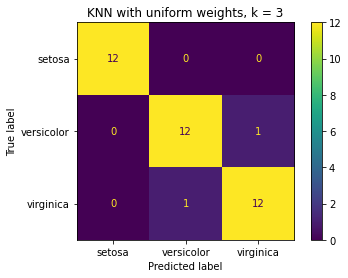

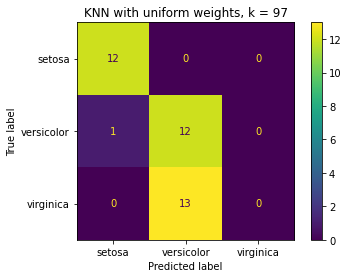

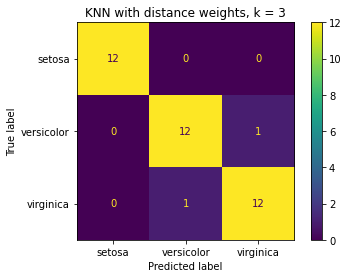

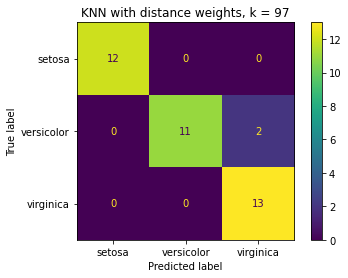

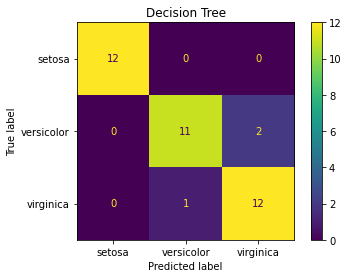

In [ ]:
#Plot KNN confusion matrix
def plotKNNMatrix(n_neighbors = 1, weights = 'uniform'):
    knn_uniform = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean', weights=weights)    
    title = "KNN with %s weights, k = %s" % (weights, n_neighbors)
    plotMatrix(knn_uniform, title)

#Plot Decision Tree confusion matrix
def plotDTMatrix():
    clf = DecisionTreeClassifier(random_state=0)
    plotMatrix(clf, 'Decision Tree')
    
def plotMatrix(clf, title):
    clf.fit(X_train, y_train)
    disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=data.target_names)
    disp.ax_.set_title(title)

plotKNNMatrix(3, 'uniform')
plotKNNMatrix(97, 'uniform')
plotKNNMatrix(3, 'distance')
plotKNNMatrix(97, 'distance')
plotDTMatrix()



As shown in the selection of matrixes above, it's clear to see that both the KNN- and decision tree method of classifying the data is fairly accurate. At least as long
as a reasonable k-value is used when using uniform weights in the KNN-method - not 97 which is almost as high as the number of samples (112).

## 3. 
The reason we need to use a separate test set is to see how our model is performing. By using x-values where we already know the corresponding y-values, we can let
our model predict its own y-values and see how accurate they are compared to the already existing values.  
The training data is used to fit the model, the model will use this data to classify elements from weights and biases. The test data however is used to make an unbiased 
test of how well the model can evaluate similar data but not the same data. If we tested our model on the same data as its trained on we can't get a fair representation
of how well it actually can classify the data.   
It can also be useful to have a separate validation dataset to get an unbiased evaluation of how well the model works on a sample of data while training the model.
The validation set is also sometimes called the development set because this test is done so we can fine tune parameters to get a better model. And finally using the 
test dataset to get an unbiased final evaluation of how well the model is performing on new data. 

As a conclusion if we dont have a seperate test set we cant really know how well the model is performing.  
 
Sources:  
[TowardsDataScience](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d60117c-244d-43ff-9bed-27d4239d5495' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>